# INDENG 242 Final Project

## Kmeans

The purpose of this document is to apply kmean to our organized dataset and let the method cluster our pair of bureaus, and the resulting label will be added to the dataset as a new variable. We will then implement Logistic regression, CART, Random forest, and Boosting, which we have previously applied, into the new dataset and see if the new variable improves the accuracy of our analysis.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
Team1vsTeam2 = pd.read_excel('Team1vsTeam2_2019-2023.xlsx') #source: https://oracleselixir.com/stats/teams/byTournament
Team1vsTeam2

,index,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,...,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin
0,T1,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,...,0.02,0.05,0.03,0.25,0.11,-0.003,-0.004,0.23,0.03,1
1,Cloud9,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,...,0.12,0.10,0.06,0.00,0.10,-0.001,0.027,0.26,-0.05,1
2,Gen.G,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,...,-0.05,-0.05,0.00,-0.40,0.01,0.002,0.019,-0.02,-0.17,1
3,Team BDS,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,...,-0.03,0.05,-0.04,0.64,-0.08,-0.012,-0.058,-0.22,-0.17,0
4,G2 Esports,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,...,0.10,-0.02,-0.03,0.56,0.06,0.001,0.017,-0.25,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,J Team,-0.109790,-0.30,-0.20,-0.47,-0.027,-5.8,-5.7,-0.12,-0.09,...,-0.05,-0.11,-0.07,-0.09,-0.08,0.000,-0.024,0.26,0.12,1
364,Dplus KIA,-0.070833,-0.09,-0.02,-0.10,0.019,-7.0,-0.1,-0.15,-0.03,...,0.04,-0.11,-0.02,-0.44,0.01,0.001,0.019,0.56,0.30,0
365,Invictus Gaming,0.103757,-0.03,0.38,0.17,0.022,1.5,9.5,-0.23,0.04,...,-0.10,-0.11,-0.05,0.03,0.10,0.016,0.039,-0.54,-0.28,1
366,Royal Never Give Up,0.177327,0.30,0.12,0.60,0.019,8.0,11.2,0.03,-0.01,...,-0.10,0.16,0.07,0.51,0.09,-0.001,0.000,0.06,-0.10,1


C:\Users\Xilin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


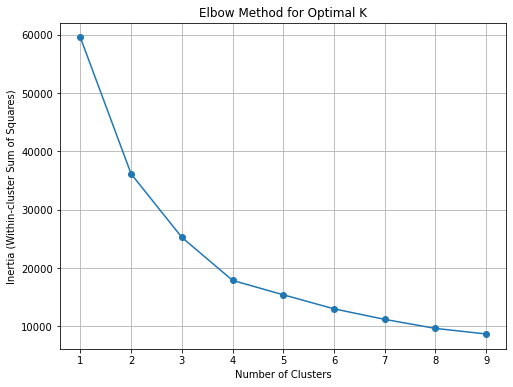

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

kmeans_features = Team1vsTeam2[['WR','KD','CKPM','GPR','GSPD','EGR','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','BN','LNE','JNG','WPM','CWPM']]  


inertia_values = []


for k in range(1, 10):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(kmeans_features)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid()
plt.show()

In [4]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2, 10):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(kmeans_features).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(kmeans_features,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3491196009461551
Silhouette score for k(clusters) = 3 is 0.3544101163993892
Silhouette score for k(clusters) = 4 is 0.37013305663404866
Silhouette score for k(clusters) = 5 is 0.3482259920787802
Silhouette score for k(clusters) = 6 is 0.33836701518233114
Silhouette score for k(clusters) = 7 is 0.344580082899256
Silhouette score for k(clusters) = 8 is 0.3384731226932761
Silhouette score for k(clusters) = 9 is 0.3376129918607912


From the above 2 tests of finding the best value for k, we can decide that 4 is an approciate number for k

In [5]:
#ADD KMeans category to Team1vsTeam2
kmeans = KMeans(n_clusters = 4)  
kmeans.fit(kmeans_features)
Team1vsTeam2['KMeans_Cluster'] = kmeans.labels_
Team1vsTeam2

,index,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,...,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin,KMeans_Cluster
0,T1,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,...,0.05,0.03,0.25,0.11,-0.003,-0.004,0.23,0.03,1,2
1,Cloud9,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,...,0.10,0.06,0.00,0.10,-0.001,0.027,0.26,-0.05,1,2
2,Gen.G,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,...,-0.05,0.00,-0.40,0.01,0.002,0.019,-0.02,-0.17,1,0
3,Team BDS,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,...,0.05,-0.04,0.64,-0.08,-0.012,-0.058,-0.22,-0.17,0,1
4,G2 Esports,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,...,-0.02,-0.03,0.56,0.06,0.001,0.017,-0.25,-0.57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,J Team,-0.109790,-0.30,-0.20,-0.47,-0.027,-5.8,-5.7,-0.12,-0.09,...,-0.11,-0.07,-0.09,-0.08,0.000,-0.024,0.26,0.12,1,1
364,Dplus KIA,-0.070833,-0.09,-0.02,-0.10,0.019,-7.0,-0.1,-0.15,-0.03,...,-0.11,-0.02,-0.44,0.01,0.001,0.019,0.56,0.30,0,1
365,Invictus Gaming,0.103757,-0.03,0.38,0.17,0.022,1.5,9.5,-0.23,0.04,...,-0.11,-0.05,0.03,0.10,0.016,0.039,-0.54,-0.28,1,2
366,Royal Never Give Up,0.177327,0.30,0.12,0.60,0.019,8.0,11.2,0.03,-0.01,...,0.16,0.07,0.51,0.09,-0.001,0.000,0.06,-0.10,1,0


---
### Logistic Regression

In [6]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
Team1vsTeam2_train, Team1vsTeam2_test = train_test_split(Team1vsTeam2, test_size=0.2, random_state=88)

In [7]:
# Original: 0.64
logreg = smf.logit(formula = 'IsWin ~ WR + KD + CKPM + GPR + GSPD + EGR + MLR + FB + FT + F3T + HLD + FD + DRG + ELD + BN + LNE + JNG + WPM + CWPM + KMeans_Cluster',
                   data = Team1vsTeam2_train).fit()
# Remove High VIF: 0.56
#logreg = smf.logit(formula = 'IsWin ~ KD + CKPM + EGR + MLR + FB + FT + F3T + HLD + FD + DRG + ELD + BN + LNE + JNG + WPM + CWPM + KMeans_Cluster',
                   #data = Team1vsTeam2_train).fit()
# Remove High p-value: 0.56
#logreg = smf.logit(formula = 'IsWin ~ WR + KD + CKPM + GPR + GSPD + FB + FT + F3T + HLD + FD + LNE + CWPM + KMeans_Cluster',
                   #data = Team1vsTeam2_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.593080
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  IsWin   No. Observations:                  294
Model:                          Logit   Df Residuals:                      273
Method:                           MLE   Df Model:                           20
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.1437
Time:                        16:01:51   Log-Likelihood:                -174.37
converged:                       True   LL-Null:                       -203.62
Covariance Type:            nonrobust   LLR p-value:                 1.213e-05
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0273      0.215     -0.127      0.899      -0.450       0.395
WR               

In [8]:
y_test = Team1vsTeam2_test['IsWin']

y_prob_logreg = logreg.predict(Team1vsTeam2_test)
y_pred_logreg = pd.Series([1 if x > 0.5 else 0 for x in y_prob_logreg], index=y_prob_logreg.index)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Accuracy, TPR, FPR
Acc_logreg = (cm_logreg.ravel()[0] + cm_logreg.ravel()[3])/sum(cm_logreg.ravel())  # T/total = (TP+TN)/total
TPR_logreg = (cm_logreg.ravel()[3])/(cm_logreg.ravel()[2] + cm_logreg.ravel()[3])  # TP/TP + FN
FPR_logreg = (cm_logreg.ravel()[1])/(cm_logreg.ravel()[0] + cm_logreg.ravel()[1])  # FP/TN + FP
print('The test Accuracy:', Acc_logreg, 'TPR: ', TPR_logreg, 'FPR: ', FPR_logreg)

The test Accuracy: 0.6486486486486487 TPR:  0.717948717948718 FPR:  0.42857142857142855


#### Predict 2023 Season World Championship

In [9]:
year2023StatForWorldsTeam = pd.read_excel(r'year2023StatForWorldsTeam.xlsx') 
year2023StatForWorldsTeam.set_index("team", inplace = True)

# Weibo Gaming in Blue
WBG_vs_T1 = year2023StatForWorldsTeam.loc[["Weibo Gaming"]].sub(year2023StatForWorldsTeam.loc[["T1"]].squeeze())
WBG_vs_T1_labels = kmeans.predict(WBG_vs_T1)

# T1 in Blue
T1_vs_WBG = year2023StatForWorldsTeam.loc[["T1"]].sub(year2023StatForWorldsTeam.loc[["LNG Esports"]].squeeze())
T1_vs_WBG_labels = kmeans.predict(T1_vs_WBG)

# Predict the Winning Rate
WBG_vs_T1['KMeans_Cluster'] = WBG_vs_T1_labels
T1_vs_WBG['KMeans_Cluster'] = T1_vs_WBG_labels

WBG_WR_LR = logreg.predict(WBG_vs_T1)
T1_WR_LR = logreg.predict(T1_vs_WBG)
print('The Winning Rate for LNG in the blue side is ', WBG_WR_LR, '; the Winning Rate for T1 in the blue side is ', T1_WR_LR)

The Winning Rate for LNG in the blue side is  team
Weibo Gaming    0.244483
dtype: float64 ; the Winning Rate for T1 in the blue side is  team
T1    0.850903
dtype: float64


---
### CART Model

Fitting 5 folds for each of 201 candidates, totalling 1005 fits
Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.5565610859728507
Node count = 51


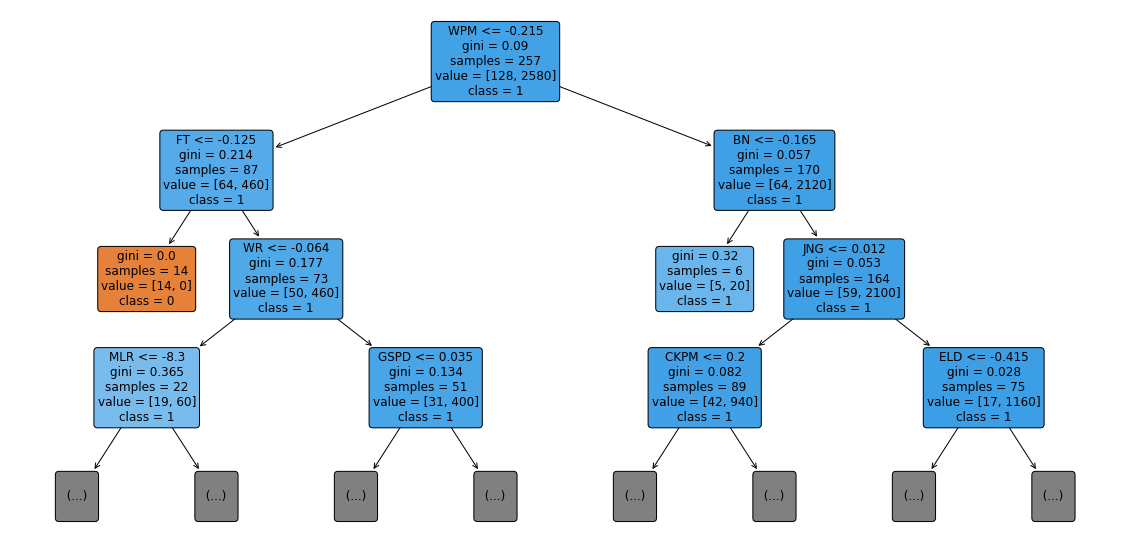

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = Team1vsTeam2[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM','KMeans_Cluster']]

Y = Team1vsTeam2[['IsWin']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}

            
dtc3 = DecisionTreeClassifier()

cv = KFold(n_splits=5,random_state=1,shuffle=True) 

dtc3_cv_acc = GridSearchCV(dtc3, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=1) 

dtc3_cv_acc.fit(X_train, Y_train)

print('Grid best parameter ccp_alpha (max. accuracy): ', dtc3_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc3_cv_acc.best_score_)

print('Node count =', dtc3_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc3_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

Y_pred = dtc3_cv_acc.best_estimator_.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
Y_proba = dtc3_cv_acc.best_estimator_.predict_proba(X_test)
print("Confusion Matrix : \n", cm)
print('Precision:',precision_score(Y_test, Y_pred))
print('Recall:',recall_score(Y_test, Y_pred))
print('Accuracy:',accuracy_score(Y_test, Y_pred))

Confusion Matrix : 
 [[ 5 44]
 [ 3 59]]
Precision: 0.5728155339805825
Recall: 0.9516129032258065
Accuracy: 0.5765765765765766


#### Predict 2023 Season World Championship

In [58]:
# Predict the Winning Rate
WBG_Pd_CART = dtc3_cv_acc.predict(WBG_vs_T1[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM','KMeans_Cluster']])
T1_Pd_CART = dtc3_cv_acc.predict(T1_vs_WBG[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM','KMeans_Cluster']])

WBG_WR_CART = dtc3_cv_acc.predict_proba(WBG_vs_T1[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM','KMeans_Cluster']])
T1_WR_CART = dtc3_cv_acc.predict_proba(T1_vs_WBG[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM','KMeans_Cluster']])

print('The Prediction for WBG in the blue side is ', WBG_Pd_CART, '; the Winning Rate for WBG in the blue side is ', WBG_WR_CART)
print('The Prediction for T1 in the blue side is ', T1_Pd_CART,'; the Winning Rate for T1 in the blue side is ', T1_WR_CART)

The Prediction for WBG in the blue side is  [1] ; the Winning Rate for WBG in the blue side is  [[0.06976744 0.93023256]]
The Prediction for T1 in the blue side is  [1] ; the Winning Rate for T1 in the blue side is  [[0.11111111 0.88888889]]


---
### Random Forest

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.03, 'max_depth': 30}
Best Accuracy:  0.6298245614035088


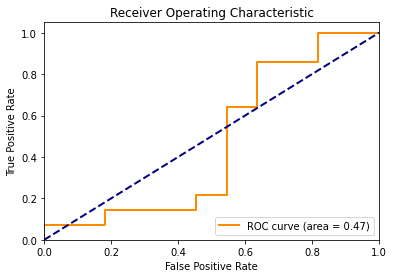

confusion matrix:
[[ 4  7]
 [ 3 11]]


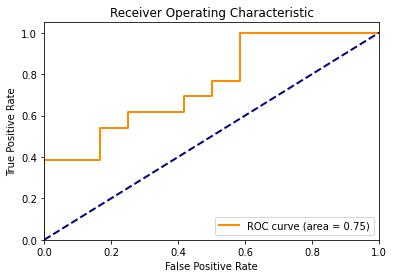

confusion matrix:
[[7 5]
 [5 8]]


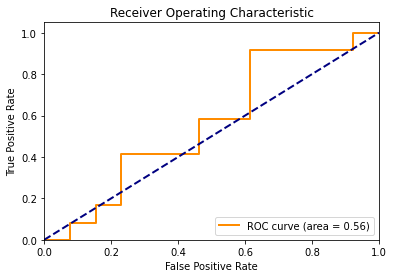

confusion matrix:
[[11  2]
 [10  2]]


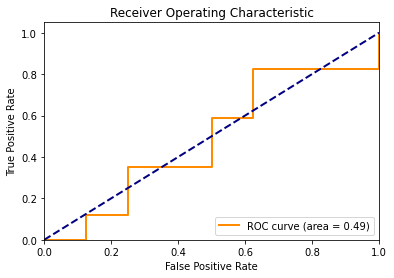

confusion matrix:
[[ 2  6]
 [ 3 14]]


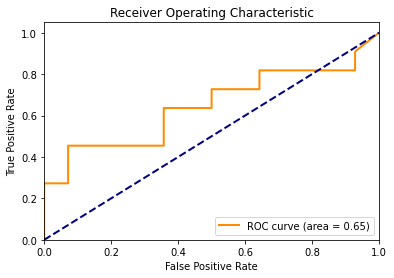

confusion matrix:
[[7 7]
 [3 8]]


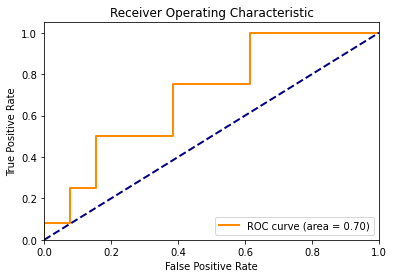

confusion matrix:
[[8 5]
 [6 6]]


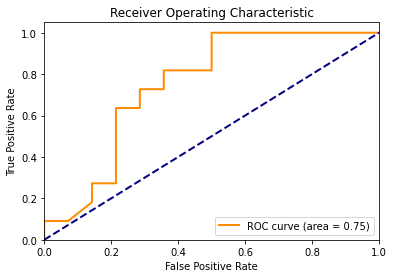

confusion matrix:
[[8 6]
 [2 9]]


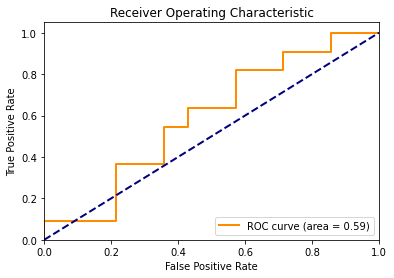

confusion matrix:
[[10  4]
 [ 7  4]]


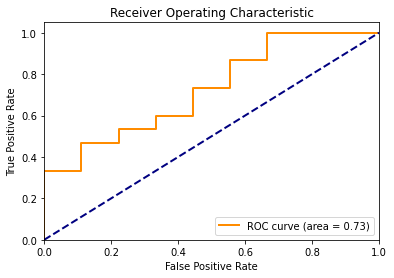

confusion matrix:
[[6 3]
 [7 8]]


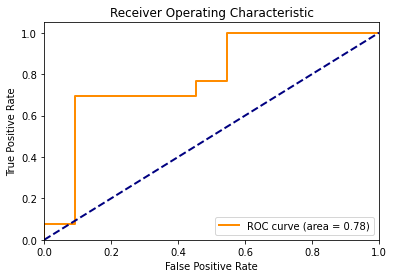

confusion matrix:
[[9 2]
 [4 9]]


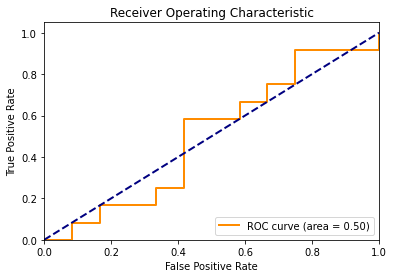

confusion matrix:
[[7 5]
 [5 7]]


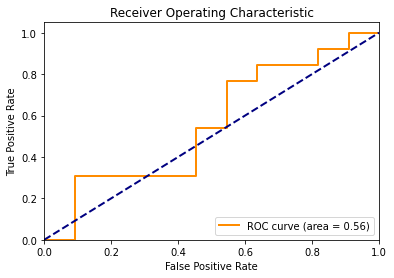

confusion matrix:
[[6 5]
 [8 5]]


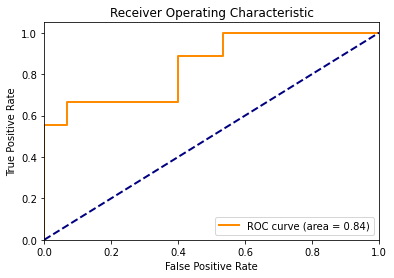

confusion matrix:
[[12  3]
 [ 3  6]]


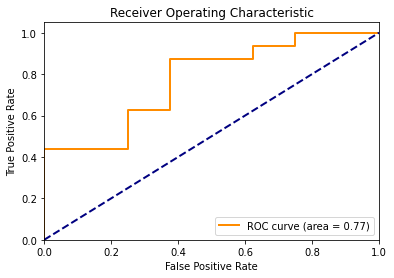

confusion matrix:
[[6 2]
 [7 9]]


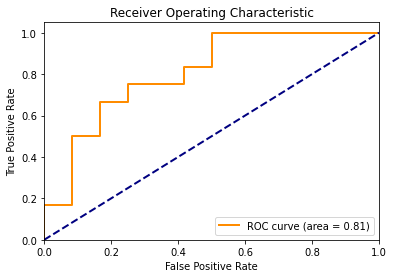

confusion matrix:
[[9 3]
 [3 9]]
accuracy: 0.6173333333333332
precision: 0.6312613312613313
recall: 0.5982094865918396
F1: 0.601797288839623
AUC: 0.6629787235730863


In [10]:
X = Team1vsTeam2[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','WPM','KMeans_Cluster']]
Y = Team1vsTeam2['IsWin']
kf = KFold(n_splits=15, shuffle=True, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=1,
    class_weight='balanced')
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'min_impurity_decrease': np.arange(0.0, 0.4, 0.01)  
}
scorer = make_scorer(accuracy_score)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, scoring=scorer, cv=kf, n_iter=10, random_state=42)
random_search.fit(X_train, Y_train)
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

rf_classifier = random_search.best_estimator_

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    rf_classifier.fit(X_train, Y_train)
    Y_prob = rf_classifier.predict_proba(X_test)[:, 1]
    custom_threshold = 0.5
    Y_pred = (Y_prob >= custom_threshold).astype(int)
    accuracy_list.append(accuracy_score(Y_test, Y_pred))
    precision_list.append(precision_score(Y_test, Y_pred))
    recall_list.append(recall_score(Y_test, Y_pred))
    f1_list.append(f1_score(Y_test, Y_pred))
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)  
    roc_auc_list.append(roc_auc)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print("confusion matrix:")
    print(conf_matrix)

print("accuracy:", sum(accuracy_list) / len(accuracy_list))
print("precision:", sum(precision_list) / len(precision_list))
print("recall:", sum(recall_list) / len(recall_list))
print("F1:", sum(f1_list) / len(f1_list))
print("AUC:", sum(roc_auc_list) / len(roc_auc_list))

#### Predict 2023 Season World Championship

In [53]:
# Predict the Winning Rate
WBG_Pd_RF = rf_classifier.predict(WBG_vs_T1[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','WPM','KMeans_Cluster']])
T1_Pd_RF = rf_classifier.predict(T1_vs_WBG[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','WPM','KMeans_Cluster']])

WBG_WR_RF = rf_classifier.predict_proba(WBG_vs_T1[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','WPM','KMeans_Cluster']])
T1_WR_RF = rf_classifier.predict_proba(T1_vs_WBG[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','WPM','KMeans_Cluster']])

print('The Prediction for WBG in the blue side is ', WBG_Pd_RF, '; the Winning Rate for WBG in the blue side is ', WBG_WR_RF)
print('The Prediction for T1 in the blue side is ', T1_Pd_RF,'; the Winning Rate for T1 in the blue side is ', T1_WR_RF)

The Prediction for WBG in the blue side is  [0] ; the Winning Rate for WBG in the blue side is  [[0.50876849 0.49123151]]
The Prediction for T1 in the blue side is  [1] ; the Winning Rate for T1 in the blue side is  [[0.49029448 0.50970552]]


---
### Boosting

In [12]:
import sys
!{sys.executable} -m pip install xgboost==1.3.3

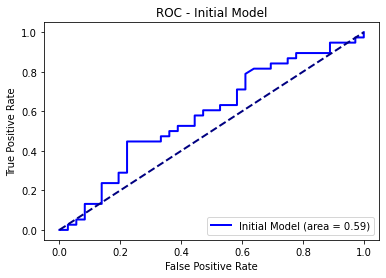

Accuracy of the initial model: 0.5540540540540541
AUC of the initial model: 0.5851608187134503
Feature Importances - Initial Model:
           Feature  Importance
16             JNG    0.087737
19  KMeans_Cluster    0.086370
1               KD    0.072373
18            CWPM    0.061060
8               FT    0.060758
17             WPM    0.056633
13             ELD    0.054014
9              F3T    0.052228
0               WR    0.046526
11              FD    0.045374
10             HLD    0.045315
5              EGR    0.042999
12             DRG    0.042950
7               FB    0.042335
14              BN    0.040866
3              GPR    0.037332
15             LNE    0.034079
6              MLR    0.032752
2             CKPM    0.031054
4             GSPD    0.027246


In [34]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target
X = Team1vsTeam2.drop('index', axis=1)
X = X.drop('IsWin', axis=1)
y = Team1vsTeam2['IsWin']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = xgb.XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy_initial = accuracy_score(y_test, y_pred)
roc_auc_initial = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
fpr_initial, tpr_initial, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr_initial, tpr_initial, color='blue', lw=2, label='Initial Model (area = %0.2f)' % roc_auc_initial)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Initial Model')
plt.legend(loc="lower right")
plt.show()

# Output accuracy and AUC
print("Accuracy of the initial model:", accuracy_initial)
print("AUC of the initial model:", roc_auc_initial)

#### Predict 2023 Season World Championship

In [51]:
# Add 0 cloumn to year2023StatForWorldsTeam as KMeans_Cluster and change the value after subtracting
year2023StatForWorldsTeam['KMeans_Cluster'] = 0

# Assuming 'scaler' is the StandardScaler instance used in our model training
selected_columns_scaled = scaler.transform(year2023StatForWorldsTeam)

# Convert the scaled data back to a DataFrame
selected_columns_scaled_df = pd.DataFrame(selected_columns_scaled, index=year2023StatForWorldsTeam.index, columns=year2023StatForWorldsTeam.columns)

# Suppose the team on the left is the blue team.
WBG_vs_T1_Boosting = selected_columns_scaled_df.loc[['Weibo Gaming']].values - selected_columns_scaled_df.loc[['T1']].values
T1_vs_WBG_Boosting = selected_columns_scaled_df.loc[['T1']].values - selected_columns_scaled_df.loc[['Weibo Gaming']].values
WBG_vs_T1_Boosting[0][-1] = WBG_vs_T1_labels
T1_vs_WBG_Boosting[0][-1] = T1_vs_WBG_labels
# Predict the outcomes
prediction_WBG = model.predict(WBG_vs_T1_Boosting)
prediction_T1 = model.predict(T1_vs_WBG_Boosting)

# Predict the outcomes with probabilities
prediction_WBG_proba = model.predict_proba(WBG_vs_T1_Boosting)
prediction_T1_proba = model.predict_proba(T1_vs_WBG_Boosting)

# Extract the win rate (probability of class 1) for each prediction
# Assuming class '1' is at index 1
WBG_WR = prediction_WBG_proba[0][1]
T1_WR = prediction_T1_proba[0][1]

# Print the predictions with win rates
print(f'Prediction for BLG vs T1: {prediction_WBG}, Win Rate: {WBG_WR}')
print(f'Prediction for T1 vs BLG {prediction_T1}, Win Rate: {T1_WR}')

Prediction for BLG vs T1: [0], Win Rate: 0.29541873931884766
Prediction for T1 vs BLG [1], Win Rate: 0.6971627473831177


---
## Conclusion
After applying kmean clustering to our collated dataset born of label refit Logistic regression, CART, Random forest and Boosting, we obtained an accuracy of 0.648, 0.576, 0.617 and 0.554 for each of the four models. When predicting the winner of the finals, we can see that Logistic regression, Random forest and Boosting all predicted that T1 would win the game and the models of Logistic regression and Boosting showed a big difference in the winning percentage of the two teams.